In [3]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt


In [4]:
import cv2
import mediapipe as mp
import numpy as np
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils



# For webcam input:


In [ ]:


cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(
        model_selection=0, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detections:
            for detection in results.detections:
                # find faces and blur them
                x = round((detection.location_data.relative_bounding_box.ymin) * image.shape[0])
                w = round((detection.location_data.relative_bounding_box.height) * image.shape[0])

                y = round((detection.location_data.relative_bounding_box.xmin) * image.shape[1])
                h = round((detection.location_data.relative_bounding_box.width) * image.shape[1])

                crop_image = image[x:x + w, y:y + h, :]
                kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
                image_blur = cv2.blur(src=crop_image, ksize=(81, 81))

                image[x:x + w, y:y + h, :] = image_blur

        cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
        if cv2.waitKey(5) & 0xFF == 27: #The Esc key
            break
cap.release()


# For image input:

Text(0.5, 1.0, 'Blured')

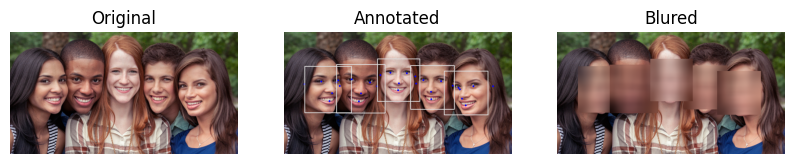

In [7]:
d =[]
# IMAGE_FILES = ['mahsa.jpeg']
IMAGE_FILES = ['faces.png']
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         plt.imshow(image)
#         plt.show()
        # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
        results = face_detection.process(image)

        # Draw face detections of each face.
        if not results.detections:
            continue
        censor_image = image.copy()
        annotated_image = image.copy()
        for detection in results.detections:
                x = round((detection.location_data.relative_bounding_box.ymin)*image.shape[0])
                w = round((detection.location_data.relative_bounding_box.height)*image.shape[0])

                y = round((detection.location_data.relative_bounding_box.xmin)*image.shape[1])
                h = round((detection.location_data.relative_bounding_box.width)*image.shape[1])

                crop_image  = image[x:x+w, y:y+h, :]
                kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
                image_blur = cv2.blur(src=crop_image, ksize=(81,81))

                image.shape, image_blur.shape
                censor_image[x:x+w, y:y+h, :] = image_blur 
                
                mp_drawing.draw_detection(annotated_image, detection)
#         plt.imshow(image)
#         plt.show()



#     cv2.imwrite('me_censor' + str(idx) + '.png', annotated_image)


fig, axs = plt.subplots(1,3, figsize=(10, 4))
# fig.suptitle('Face Censor')
axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original')

axs[1].imshow(annotated_image)
axs[1].axis('off')
axs[1].set_title('Annotated')

axs[2].imshow(censor_image)
axs[2].axis('off')
axs[2].set_title('Blured')


# For existing video input:

In [6]:
input_video_path = 'video.mp4'
cap = cv2.VideoCapture(input_video_path)
# cap.set(cv2.CAP_PROP_FPS, 10)


# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, cap.get(5), (int(cap.get(3)), int(cap.get(4))))


    
with mp_face_detection.FaceDetection(
        model_selection=0, min_detection_confidence=0.5) as face_detection:    

    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            break

    
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detections:
            for detection in results.detections:
                try:
                    # find faces and blur them
                    x = round((detection.location_data.relative_bounding_box.ymin) * image.shape[0])
                    w = round((detection.location_data.relative_bounding_box.height) * image.shape[0])

                    y = round((detection.location_data.relative_bounding_box.xmin) * image.shape[1])
                    h = round((detection.location_data.relative_bounding_box.width) * image.shape[1])

                    crop_image = image[x:x + w, y:y + h, :]
                    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
                    image_blur = cv2.blur(src=crop_image, ksize=(81, 81))

                    image[x:x + w, y:y + h, :] = image_blur
                    out.write(image)
                except:
                    pass

                
cap.release()
out.release()
print('done :)')

Ignoring empty camera frame.
done :)
